In [ ]:
! python3 gatherData.py

In [97]:
import csv
import pandas
import numpy as np
import matplotlib.pyplot as plt
import random
import neuralnetworks as nn

def csv_read(filename):
	with open(filename, 'r') as f:
		reader = csv.reader(f)
		matrix = list(reader)
	return matrix
def rmse(A, B):
    return np.sqrt(np.mean((A - B)**2))

data = pandas.read_csv("./medical_stock_prices.csv")
data = data.drop(['Date'], axis=1)
data = data.dropna()
data.shape

BKD = np.array(data[['BKD']].transpose())
CSU = np.array(data[['CSU']].transpose())
CYH = np.array(data[['CYH']].transpose())
KND = np.array(data[['KND']].transpose())
NHC = np.array(data[['NHC']].transpose())
(BKD.shape, CSU.shape, CYH.shape)

((1, 959), (1, 959), (1, 959))

In [98]:
T = data[['NHC', 'CYH']]
T3 = data[['CYH']]
T6 = data[['NHC']]
#X1 = []
#X2 = []
X3 = []
#X4 = []
#X5 = []
X6 = []
for i in range(0, T.shape[0] - 31): # Leave the last 7 data points untouched
    #X1.append(BKD[0, i:i+7])
    #X2.append(CSU[0, i:i+7])
    X3.append(CYH[0, i:i+24])
    #X4.append(FVE[0, i:i+7])
    #X5.append(KND[0, i:i+7])
    X6.append(NHC[0, i:i+24])
#X1 = np.array(X1)
#X2 = np.array(X2)
X3 = np.array(X3)
#X4 = np.array(X4)
#X5 = np.array(X5)
X6 = np.array(X6)
#(X1.shape, X2.shape, X3.shape, T.shape)

In [99]:
X = np.vstack((X3, X6))
X.shape

(1856, 24)

In [100]:
T = np.vstack(( np.array(T3[24:-7]),np.array(T6[24:-7]) ))
T.shape

(1856, 1)

In [88]:
nRows = X.shape[0]
rows = np.arange(nRows)
np.random.shuffle(rows)
nTrain = int(nRows * 0.8)
trainRows = rows[:nTrain]
testRows = rows[nTrain:]
Xtrain, Ttrain = X[trainRows, :], T[trainRows, :]
Xtest, Ttest = X[testRows, :], T[testRows, :]
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((1484, 24), (1484, 1), (372, 24), (372, 1))

hiddens = [0, [1], [1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [2], [2, 2], [2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2], [5], [5, 5], [5, 5, 5, 5], [5, 5, 5, 5, 5, 5, 5], [20], [20, 20], [20, 20, 20, 20], [20, 20, 20, 20, 20, 20, 20]]
                               0         1         2
0                              0  0.796729  0.840882
1                            [1]  0.817462  0.854760
2                         [1, 1]  0.857167  0.893054
3                   [1, 1, 1, 1]  0.936291  0.975785
4          [1, 1, 1, 1, 1, 1, 1]  0.930778  0.963097
5                            [2]  0.811504  0.867298
6                         [2, 2]  0.807481  0.841668
7                   [2, 2, 2, 2]  0.872080  0.912551
8          [2, 2, 2, 2, 2, 2, 2]  0.813097  0.855825
9                            [5]  0.788496  0.846877
10                        [5, 5]  0.801395  0.880602
11                  [5, 5, 5, 5]  0.800453  0.860156
12         [5, 5, 5, 5, 5, 5, 5]  0.800389  0.860292
13                          [2

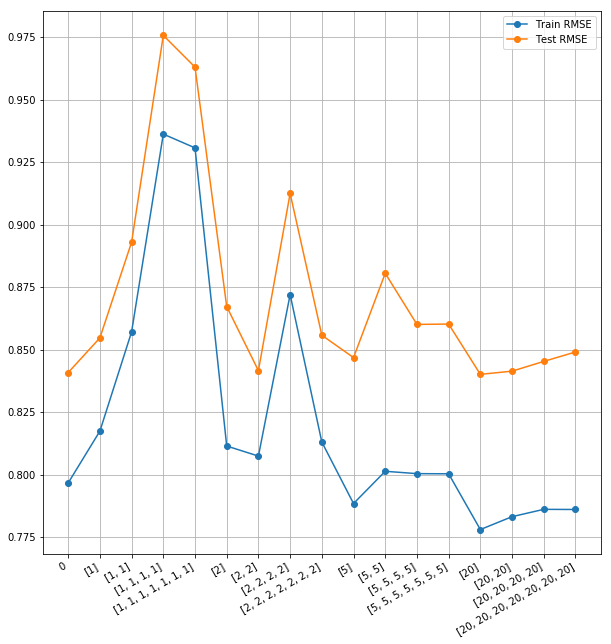

In [90]:
errors = []
hiddens = [0] + [[nu] * nl for nu in [1, 2, 5, 20] for nl in [1, 2, 4]]
print('hiddens =', hiddens)
for hids in hiddens: 
    nnet = nn.NeuralNetwork(Xtrain.shape[1], hids, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, 500)
    errors.append([hids, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pandas.DataFrame(errors)
print(errors)

plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), hiddens, rotation=30, horizontalalignment='right')
plt.grid(True)
plt.show()

hiddens = [20, 20]
nIterations = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
           0         1         2
0   [20, 20]  1.813510  1.754450
1   [20, 20]  1.262964  1.275009
2   [20, 20]  0.857437  0.895331
3   [20, 20]  0.803599  0.854543
4   [20, 20]  0.802300  0.853355
5   [20, 20]  0.797568  0.845017
6   [20, 20]  0.806440  0.841686
7   [20, 20]  0.793262  0.842873
8   [20, 20]  0.800144  0.850147
9   [20, 20]  0.785935  0.844701
10  [20, 20]  0.772465  0.838313
11  [20, 20]  0.791961  0.846140


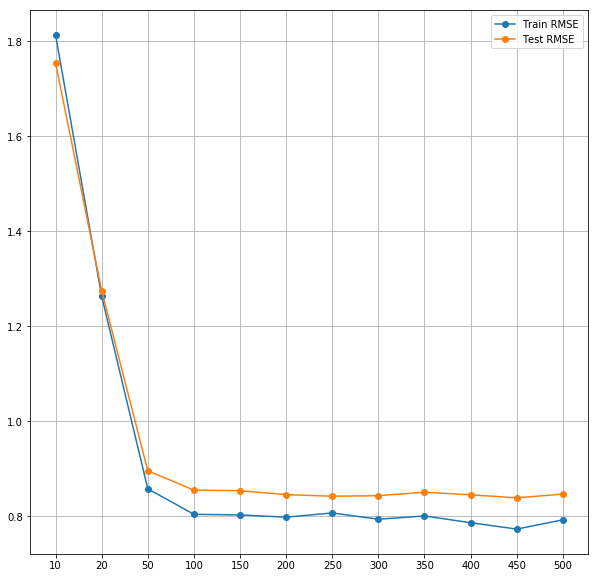

In [91]:
errors = []
hiddens = [20,20]
nIterationsList = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
print('hiddens =', hiddens)
print('nIterations =', nIterationsList)
for iters in nIterationsList: 
    nnet = nn.NeuralNetwork(Xtrain.shape[1], hiddens, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, iters)
    errors.append([hiddens, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pandas.DataFrame(errors)


print(errors)
plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), nIterationsList) # , rotation=30, horizontalalignment='right')
plt.grid(True)
plt.show()

In [103]:
T = data[['NHC', 'CYH']]
t3 = data[['CYH']]
t6 = data[['NHC']]
x3 = []
x6 = []
for i in range(T.shape[0] - 38, T.shape[0] - 31): # Leave the last 7 data points untouched
    x3.append(CYH[0, i:i+24])
    x6.append(NHC[0, i:i+24])
x3 = np.array(x3)
x6 = np.array(x6)
t = T[-7:]
x_predict_current_week = np.vstack((x3, x6))

In [104]:
last_7_days_prediction = nnet.use(x_predict_current_week) # Should be predicting up to the last data point in csv file
last_7_days_prediction

array([[ 51.23849897],
       [ 50.5004676 ],
       [ 51.02127557],
       [ 50.71622582],
       [ 50.68584105],
       [ 51.68806593],
       [ 53.40554295],
       [ 58.19095782],
       [ 57.51059484],
       [ 58.07790185],
       [ 57.37880687],
       [ 57.04361979],
       [ 57.28081312],
       [ 58.74235052]])

In [105]:
t

,NHC,CYH
3526,59.012733,54.58
3527,59.724633,55.02
3528,59.734000,54.99
3529,59.518557,55.36
3530,60.267925,55.09
3531,60.305393,54.95
3532,60.004055,54.92


# This whole project isn't good. I'm closing this notebook.